In [112]:
import numpy as np
from matplotlib import pyplot as plt
from astropy import constants as const
from astropy import units as u

### Problem 3.1 ###

Sketch orbital speed as a function of orbital size for a planet orbiting the Sun.


$ \vec{F} = m \vec{a}$

$\frac{G M_\odot m}{r^2} =  \frac{m~v^2}{r} $

$\frac{G M_\odot }{r^2} =  \frac{v^2}{r} $

$\frac{G M_\odot }{r} =  {v^2} $

$\sqrt{\frac{G M_\odot }{r}} =  {v} $

In [113]:
# I know pluto is at 39 AU, so make radius span from 0 the 39*1.5e11
r = np.linspace(.1,39.,100)*const.au
v = np.sqrt(const.G*const.M_sun/r)

Text(0,0.5,'Orbital speed (m/s)')

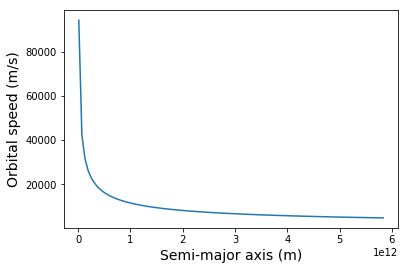

In [114]:
plt.figure()
plt.plot(r,v,label='Keplerian Motion')
plt.xlabel('Semi-major axis (m)',fontsize=14)
plt.ylabel('Orbital speed (m/s)',fontsize=14)

### Problem 3.3 ###

Given:
* $P = 27$ yr
* $r_{min} = 3$ AU


In [115]:
P = 27
rmin = 3

Find:
* $r_{max}$


Solution:

First, we can find the semi-major axis using Kepler's third law:

$P^2 = a^3$

$ a = P^{\frac{2}{3}} $

In [116]:
a = (27)**(2./3)
print('%.1f'%(a))

9.0


Then, we know from Eqn 3.3 that pericenter (closest point)

$r_p = r_{min} = a(1 - e)$

We are given $r_{min}$ so we can now solve for $e$:

$e = 1 - \frac{r_{min}}{a}$

In [117]:
e = 1 - rmin/a
print('%.2f'%(e))

0.67


and at apocenter (furthest point)

$r_a = r_{max} = a(1+e) $

So now we can solve for $r_{max}$.

In [118]:
rmax = a*(1+e)
print('%.1f'%(rmax))

15.0


### Problem 3.5 ###

Solved in another notebook.

https://github.com/rfinn/ASTR390/blob/master/jupiter-mass.ipynb

### Problem 3.7 ###

Given:
* extrasolar planet
* $M_\star = 2 M_\odot$
* P = 3 months

Find:
* semi-major axis

Solution:

Use the full form of Kepler's Third Law:

$ P^2 = \frac{4 \pi^2}{GM} a^3 $


To solve for a:

$ a^3 = P^2 \frac{GM}{4\pi^2} $


$ a = \left(P^2 \frac{GM}{4\pi^2} \right) ^{1/3} $

In [119]:
M = 2.*const.M_sun

In [120]:
# convert period to seconds
P = 3.*(30)*(24)*3600*u.s # (30 d/month)(24hr/d)(3600s/hr)

In [121]:
a = np.cbrt((P**2)*const.G*M/(4*np.pi**2))
print('%.3f AU'%(a.to(u.au).value))

0.495 AU


### Problem 3.8 ###

Given:
* $\lambda = 6600$ A
* $a = 30$ pc
* $M_{BH} = 9 \times 10^8 M_\odot $

Find:
* $\Delta \lambda$ for light emitted by gas at 30 pc


Solution:

* Find period of rotation for gas
* Then calculate speed of rotation using $v = 2 \pi r/P$
* Then calculate shift in wavelength using $v/c = \Delta \lambda/\lambda $

Period from Kepler's 3rd Law:

$ P = \sqrt{\frac{4 \pi^2}{GM} a^3}$



In [122]:
lamb = 6600.*1.e-10*u.m
a = 30.*u.pc
M = 9.e8 * const.M_sun

In [123]:
a.to(u.m)

<Quantity 9.25703274e+17 m>

In [124]:
P = np.sqrt(4*np.pi**2*(a.to(u.m))**3/const.G/M)

In [125]:
P.to(u.yr)

<Quantity 513105.33406267 yr>

Find velocity

In [126]:
v = 2 * np.pi * a.to(u.m)/P

Solve for $\Delta \lambda$

In [127]:
dlamb = v/const.c * lamb

In [128]:
dlamb

<Quantity 7.90795892e-10 m>

So the shift is 8 Angstroms.  Yay!